In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/home/user/veridia.io/archive/Resume/Resume.csv")
print(df.columns)
df['Category'].value_counts()

Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

Dataset shape: (2484, 4)
Dataset Info:
Shape: (2484, 4)
Columns: ['ID', 'Resume_str', 'Resume_html', 'Category']

Missing values:
ID             0
Resume_str     0
Resume_html    0
Category       0
dtype: int64

Data types:
ID              int64
Resume_str     object
Resume_html    object
Category       object
dtype: object
Label Distribution:
Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE    

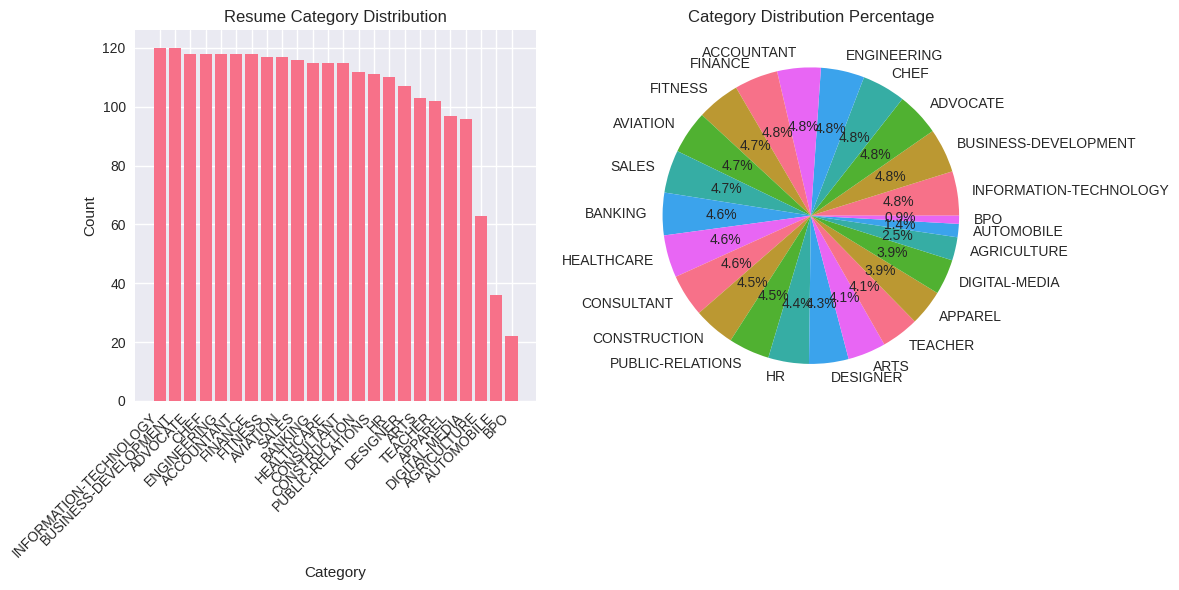

Total categories: 24
Most common category: INFORMATION-TECHNOLOGY (120 samples)
Least common category: BPO (22 samples)
Class imbalance ratio (max/min): 5.45

Text Length Statistics:
Average character length: 6295.31
Average word count: 811.33
Min character length: 21
Max character length: 38842
Min word count: 0
Max word count: 5190


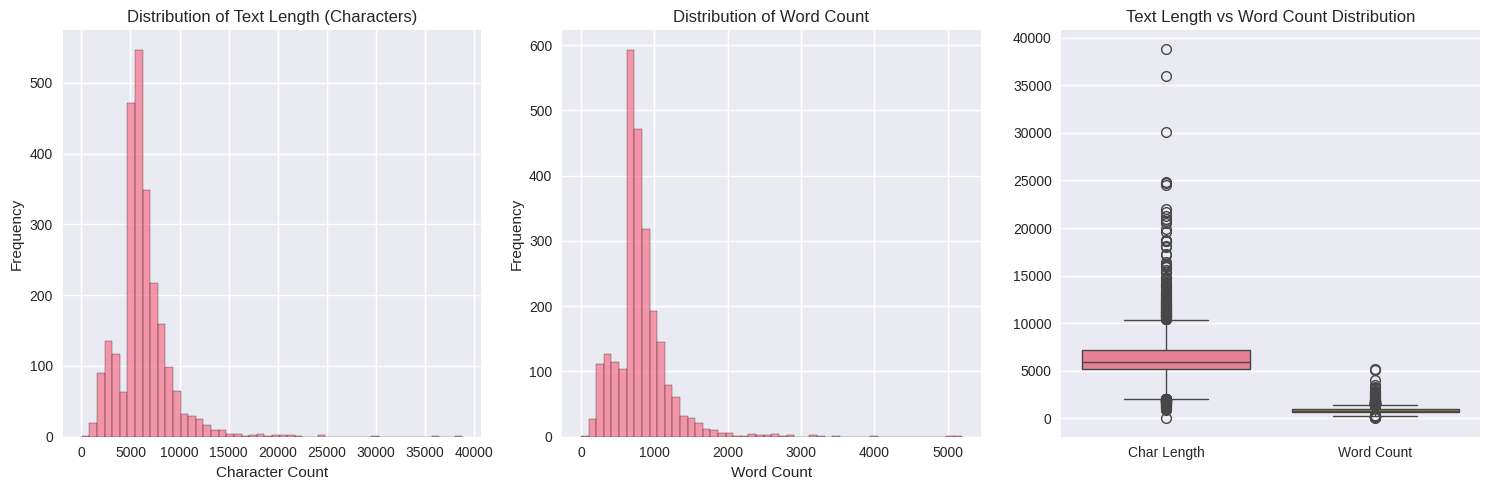

Duplicate resumes (text only): 2
Fully duplicate rows: 0

Duplicate text samples:
      Category                                         Resume_str
1490   FINANCE           FINANCE OFFICER         Professional ...
1509   FINANCE           FINANCE OFFICER         Professional ...
2444  AVIATION           STOREKEEPER II       Professional Sum...
2483  AVIATION           STOREKEEPER II       Professional Sum...
Resumes with special characters: 2483/2484
Resumes with numbers: 2483/2484
Resumes with uppercase letters: 2483/2484
Empty or whitespace-only resumes: 1


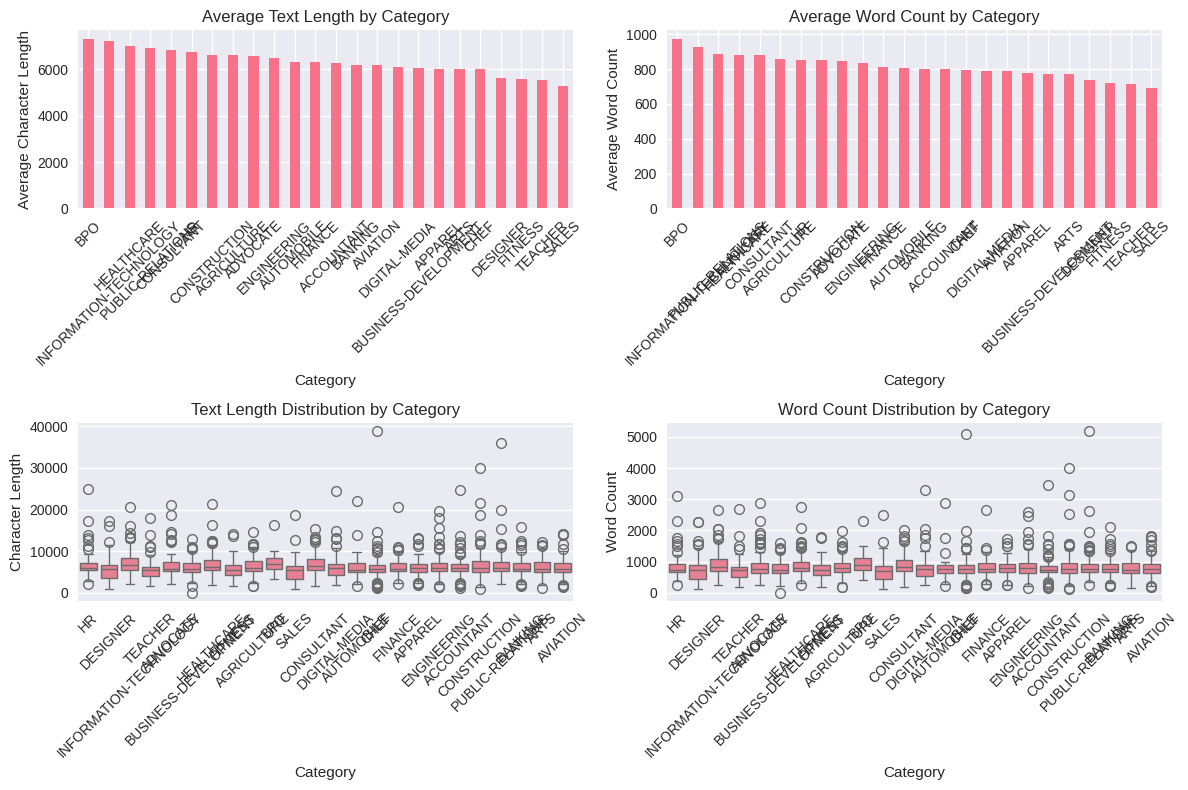


Summary:
Total resumes: 2484
Number of categories: 24
Duplicate resumes found: 2
Data quality issues: 1 empty texts


In [4]:

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Dataset shape:", df.shape)
df.head()

print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

print("\nMissing values:")
print(df.isnull().sum())

print("\nData types:")
print(df.dtypes)

label_distribution = df['Category'].value_counts()
print("Label Distribution:")
print(label_distribution)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
bars = plt.bar(label_distribution.index, label_distribution.values)
plt.title('Resume Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
plt.pie(label_distribution.values, labels=label_distribution.index, autopct='%1.1f%%')
plt.title('Category Distribution Percentage')

plt.tight_layout()
plt.show()

print(f"Total categories: {len(label_distribution)}")
print(f"Most common category: {label_distribution.index[0]} ({label_distribution.values[0]} samples)")
print(f"Least common category: {label_distribution.index[-1]} ({label_distribution.values[-1]} samples)")

imbalance_ratio = label_distribution.max() / label_distribution.min()
print(f"Class imbalance ratio (max/min): {imbalance_ratio:.2f}")

df['text_length'] = df['Resume_str'].str.len()
df['word_count'] = df['Resume_str'].str.split().str.len()

print("\nText Length Statistics:")
print(f"Average character length: {df['text_length'].mean():.2f}")
print(f"Average word count: {df['word_count'].mean():.2f}")
print(f"Min character length: {df['text_length'].min()}")
print(f"Max character length: {df['text_length'].max()}")
print(f"Min word count: {df['word_count'].min()}")
print(f"Max word count: {df['word_count'].max()}")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Text Length (Characters)')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=df[['text_length', 'word_count']])
plt.title('Text Length vs Word Count Distribution')
plt.xticks([0, 1], ['Char Length', 'Word Count'])

plt.tight_layout()
plt.show()

duplicate_text = df.duplicated(subset=['Resume_str']).sum()
duplicate_all = df.duplicated().sum()

print(f"Duplicate resumes (text only): {duplicate_text}")
print(f"Fully duplicate rows: {duplicate_all}")

if duplicate_text > 0:
    print("\nDuplicate text samples:")
    duplicates = df[df.duplicated(subset=['Resume_str'], keep=False)]
    print(duplicates[['Category', 'Resume_str']].head())

df['has_special_chars'] = df['Resume_str'].str.contains(r'[^\w\s]', regex=True)
special_char_count = df['has_special_chars'].sum()
print(f"Resumes with special characters: {special_char_count}/{len(df)}")

df['has_numbers'] = df['Resume_str'].str.contains(r'\d', regex=True)
number_count = df['has_numbers'].sum()
print(f"Resumes with numbers: {number_count}/{len(df)}")

df['has_uppercase'] = df['Resume_str'].str.contains(r'[A-Z]', regex=True)
uppercase_count = df['has_uppercase'].sum()
print(f"Resumes with uppercase letters: {uppercase_count}/{len(df)}")

empty_text = (df['Resume_str'].str.strip() == '').sum()
print(f"Empty or whitespace-only resumes: {empty_text}")

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
category_lengths = df.groupby('Category')['text_length'].mean().sort_values(ascending=False)
category_lengths.plot(kind='bar')
plt.title('Average Text Length by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Character Length')

plt.subplot(2, 2, 2)
category_words = df.groupby('Category')['word_count'].mean().sort_values(ascending=False)
category_words.plot(kind='bar')
plt.title('Average Word Count by Category')
plt.xticks(rotation=45)
plt.ylabel('Average Word Count')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='Category', y='text_length')
plt.title('Text Length Distribution by Category')
plt.xticks(rotation=45)
plt.ylabel('Character Length')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='Category', y='word_count')
plt.title('Word Count Distribution by Category')
plt.xticks(rotation=45)
plt.ylabel('Word Count')

plt.tight_layout()
plt.show()
print("\nSummary:")
print(f"Total resumes: {len(df)}")
print(f"Number of categories: {len(label_distribution)}")

print(f"Duplicate resumes found: {duplicate_text}")
print(f"Data quality issues: {empty_text} empty texts")

In [6]:
# Handle duplicates and empty texts
print("Before cleaning:")
print(f"Total resumes: {len(df)}")
print(f"Duplicates: {df.duplicated(subset=['Resume_str']).sum()}")
print(f"Empty texts: {(df['Resume_str'].str.strip() == '').sum()}")

# Remove duplicates based on resume_text
df = df.drop_duplicates(subset=['Resume_str'])

# Remove empty texts
df = df[df['Resume_str'].str.strip() != '']

print("\nAfter cleaning:")
print(f"Total resumes: {len(df)}")
print(f"Duplicates: {df.duplicated(subset=['Resume_str']).sum()}")
print(f"Empty texts: {(df['Resume_str'].str.strip() == '').sum()}")

# Check label distribution after cleaning
label_distribution = df['Category'].value_counts()
print(f"\nCategories after cleaning: {len(label_distribution)}")

# Save cleaned dataset
df.to_csv('/home/user/veridia.io/archive/Resume/resume_cleaned.csv', index=False)
print("\nCleaned dataset saved to 'resume_cleaned.csv'")

Before cleaning:
Total resumes: 2484
Duplicates: 2
Empty texts: 1

After cleaning:
Total resumes: 2481
Duplicates: 0
Empty texts: 0

Categories after cleaning: 24

Cleaned dataset saved to 'resume_cleaned.csv'
